In [48]:
import pymongo
import base64
import numpy as np
from PIL import Image
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Connected to MongoDB client.
Accessed database 'fingerprintDB'.
Accessed collection 'fingerprints'.
Number of documents in 'fingerprints' collection: 1
First document in 'fingerprints' collection: {'_id': ObjectId('6656fbbcee33dde2b917a170'), 'fingerprint': '{"UserAgent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36","IpAddress":"143.93.182.15","ScreenResolution":"1536 x 960","ColorDepth":24,"AvailableScreenResolution":"1536x912","PixelRatio":1.25,"TimezoneOffset":-120,"SessionStorage":true,"LocalStorage":true,"IndexedDB":true,"CookiesEnabled":true,"TouchSupport":true,"DoNotTrack":"1","HardwareConcurrency":20,"Platform":"Win32","Plugins":["PDF Viewer","Chrome PDF Viewer","Chromium PDF Viewer","Microsoft Edge PDF Viewer","WebKit built-in PDF"],"PdfViewerEnabled":true,"ForcedColors":false,"canvasFingerprint":"","webGLFingerprint":"{\\"vendor\\":\\"WebKit\\",\\"renderer\\":\\"WebKit WebGL\\",\\"maxAnisotropy\\":16}"}', 'fi
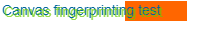
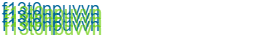
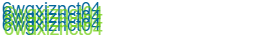
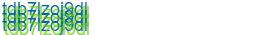
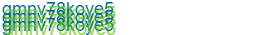
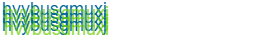
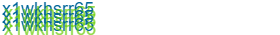
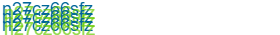
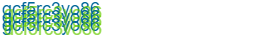
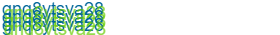
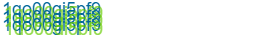
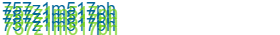
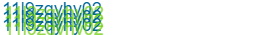
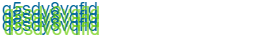
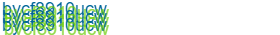
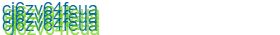
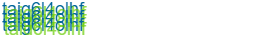
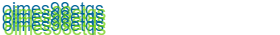
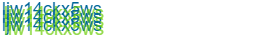
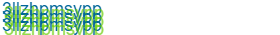
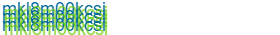

In [49]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
print("Connected to MongoDB client.")

db = client["fingerprintDB"]
print("Accessed database 'fingerprintDB'.")

collection = db["fingerprints"]
print("Accessed collection 'fingerprints'.")

# Print the number of documents in the collection
print(f"Number of documents in 'fingerprints' collection: {collection.count_documents({})}")

# Print the first document in the collection
first_document = collection.find_one()
print(f"First document in 'fingerprints' collection: {first_document}")

In [50]:
def resize_image(image, target_size):
    print("Resizing image...")
    resized_image = np.array(Image.fromarray(image).resize(target_size, Image.LANCZOS))
    print("Image resized.")
    return resized_image


In [51]:
def resize_image(image, target_size):
    return np.array(Image.fromarray(image).resize(target_size, Image.LANCZOS))


In [52]:
target_size = (35, 280)


In [53]:
users_data = collection.find()
for user in users_data:
    print(f"Processing user: {user['username']}")
    canvases = []
    labels = []
    for canvas in user["canvases"]:
        print("Decoding and resizing canvas...")
        decoded_image = decode_canvas(canvas)
        print(f"Decoded image shape: {decoded_image.shape}")
        resized_image = resize_image(decoded_image, target_size)
        print(f"Resized image shape: {resized_image.shape}")
        canvases.append(resized_image)
        labels.append(user["username"])
    
    print("Normalizing canvas data...")
    canvases = np.array(canvases) / 255.0
    print(f"Canvases shape: {canvases.shape}")
    labels = np.array(labels)
    print(f"Labels shape: {labels.shape}")
    
    # Labels in numerische Werte umwandeln
    print("Encoding labels...")
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    print(f"Encoded labels shape: {labels.shape}")
    
    # Daten in Trainings- und Testdaten aufteilen
    print("Splitting data into training and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(canvases, labels, test_size=0.2, random_state=42)
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    
    # Modell erstellen
    print("Creating model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(280, 35, 4)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    
    # Modell kompilieren
    print("Compiling model...")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Modell trainieren
    print("Training model...")
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
    # Modell speichern
    print("Saving model...")
    model.save(f'model_{user["username"]}.h5')
    print("Model saved.")

Processing user: username_1
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resized image shape: (280, 35, 4)
Decoding and resizing canvas...
Decoded image shape: (35, 280, 4)
Resize

In [54]:
# Modell evaluieren
evaluation = model.evaluate(X_test, y_test)
print(f"Test loss: {evaluation[0]}")
print(f"Test accuracy: {evaluation[1]}")


1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test loss: 0.0
Test accuracy: 0.0


In [55]:
import pymongo
import base64
import numpy as np
from PIL import Image
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# MongoDB-Verbindung herstellen
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["fingerprintDB"]
collection = db["fingerprints"]

def decode_canvas(canvas_data):
    image_data = base64.b64decode(canvas_data.split(",")[1])
    image = Image.open(BytesIO(image_data))
    return np.array(image)

def resize_image(image, target_size):
    return np.array(Image.fromarray(image).resize(target_size, Image.LANCZOS))

target_size = (35, 280)

users_data = collection.find()
for user in users_data:
    canvases = []
    labels = []
    for canvas in user["canvases"]:
        decoded_image = decode_canvas(canvas)
        resized_image = resize_image(decoded_image, target_size)
        canvases.append(resized_image)
        labels.append(user["username"])
    
    canvases = np.array(canvases) / 255.0
    labels = np.array(labels)
    
    # Labels in numerische Werte umwandeln
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    
    # Daten in Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(canvases, labels, test_size=0.2, random_state=42)
    
    # Modell erstellen
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(280, 35, 4)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    
    # Modell kompilieren
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Modell trainieren
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
    # Modell evaluieren
    evaluation = model.evaluate(X_test, y_test)
    print(f"Test loss: {evaluation[0]}")
    print(f"Test accuracy: {evaluation[1]}")
    
    # Modell speichern
    model.save(f'model_{user["username"]}.h5')

    # Modell in TensorFlow.js umwandeln
    import os
    os.system(f'tensorflowjs_converter --input_format=keras model_{user["username"]}.h5 /path/to/tfjs_model_{user["username"]}')


Epoch 1/10
1/1 [==============================] - 1s 656ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 90ms/step - loss